Что можно взять для того, чтобы распознавать токены как аспекты?
1. Мы говорили о CRF и подобных
2. Мы говорили о разных нейронках -- преимущественно свёртки и рекуррентные
3. Нам нужно будет работать с текстом

Исходя из этого и погуглив тьюториалы на пайторче, решено было использовать сочетание LSTM и CRF, с надеждой на то, что на наших маленьких примерах эта модель с небольшим количеством эпох не успеет сильно переобучиться

И кажется, нам удалось. Качество на тесте, конечно, ниже, чем на трейне -- однако мы выделяем почти все метки, что нужны

Что мы брали для обучения и зачем. Что -- train_split из проекта. Что мы с ним делали:
1. Взяли ревью и аспекты
2. Разметили ревью леммами, стартом и эндом (есть варианты сто станзой и с ручной разметкой, в ручной что-то сбивается)
3. По старту и энду мы нашли для каждого токена, является ли он каким-нибудь аспектом, и если да, то каким
4. Последовательность лемм предложения и последовательность тегов аспектов предложения подаётся в модель
5. С тестом делается та же предобработка
6. Последовательности лемм предложений теста подаются в модель
7. Модель отдаёт последовательность тегов аспектов
8. Каждому токену в датафрейме отдаём его аспект
9. С помощью Dostoevsky предсказываем тональность
10. На основании предсказанного собираем тональность по категориям отзыва
11. Сравниваемся с эталоном

Что получилось:
1. Моделька хорошая. Берём случайное предложение, вообще никакого отношения к корпусу не имеющее. Смотрим, как хорошо.
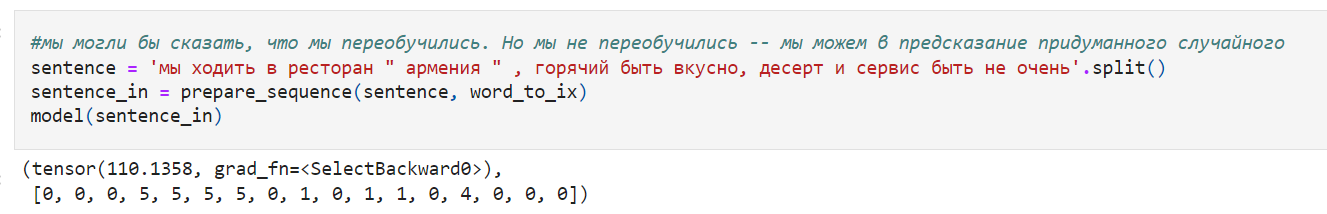

5 -- это место, 1 -- еда, 4 -- сервис. Всё как положно

2. Когда мы сравниваем наши полученные предсказания для теста с эталонными предсказаниями для теста, получается хорошо. Но это не совсем тот файл-эталон, с которым мы сравниваемся в итоге. Это метки, приписанные токенам теста точно так же, как метки трейна были приписаны токенам трейна. И вот что мы можем увидеть:
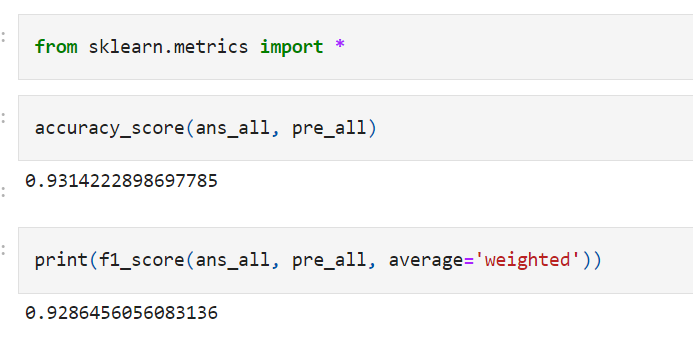

3. Так что модель действительно хороша. Так в чём же проблема тогда? Да в предобработке. Вот эта -- результат срочной переделки неподходящей старой. Но она не учитывает, что некоторые токены составляют одну единую сущность. Это можно учесть, и даже довольно просто, склеив в одну сущность соседние по старту и энду сущности с одинаковым тегом для каждого текста. Это будет работать ещё лучше, чем то, что мы показываем

4. Эта проблема объясняет и наши полученные на тесте результаты. Не всё, что мы выделили, совпало с золотым стандартом, потому что у нас многословные аспекты представлены как цепочка однословных. Их можно объединить относительно несложной ячейкой, но я и так вторые сутки кроме полировки своей части проекта переделываю не свою часть работы, и времени мне на всё не хватило
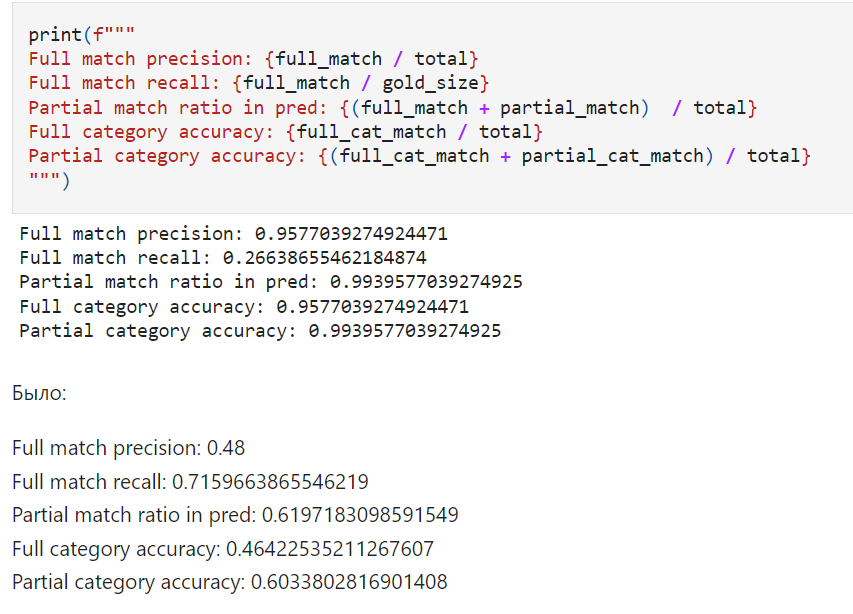

Что получается: раньше у нас были данные, на которых был высокий реколл, но низкое всё остальное. Сейчас наоборот. Но не потому, что мы не выделяем нужные токены (см.метрику accuracy в)